In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import itertools

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# # Merging two datasets
# samples_path = "/content/drive/MyDrive/Gav/Data/DRB3_Alleles2AminoAcids.xlsx"
# df1 = pd.read_excel(samples_path)
# df1.iloc[:,0] = df1.iloc[:,0].str[19:-6]
# samples_path = "/content/drive/MyDrive/Gav/Data/DRB3_Alleles.xlsx"
# df2 = pd.read_excel(samples_path)
# df = pd.merge(df2, df1, on='Allele')
# df = df.drop(df.columns[2], axis='columns')
# df.columns = list(df.columns[:2]) + ["Amino"+str(i) for i in range(len(df.columns[2:]))]
# df.to_excel("/content/drive/MyDrive/Gav/Data/DRB3_AlleleAminoResis.xlsx", index=False)

In [74]:
samples_path = "/content/drive/MyDrive/Gav/Data/DRB3_AlleleAminoResis.xlsx"
df = pd.read_excel(samples_path)
df = df[df["R/S/N"]!="N"].reset_index(drop=True)
df

,Allele,R/S/N,Amino0,Amino1,Amino2,Amino3,Amino4,Amino5,Amino6,Amino7,...,Amino68,Amino69,Amino70,Amino71,Amino72,Amino73,Amino74,Amino75,Amino76,Amino77
0,*001:01,S,E,Y,S,K,S,E,C,H,...,R,V,C,R,H,N,Y,G,G,M
1,*002:01,R,E,Y,S,T,S,E,C,H,...,T,Y,C,R,H,N,Y,G,G,V
2,*005:02,S,E,Y,H,K,S,E,C,H,...,T,Y,C,R,H,N,Y,G,V,G
3,*005:03,S,E,Y,S,K,S,E,C,H,...,T,Y,C,R,H,N,Y,G,V,F
4,*007:01,R,E,Y,C,K,R,E,C,H,...,R,V,C,R,H,N,Y,G,V,V
5,*009:02,R,E,Y,S,K,S,E,C,H,...,R,V,C,R,H,N,Y,G,V,G
6,*010:01,R,E,Y,S,K,S,E,C,H,...,T,Y,C,R,H,N,Y,G,V,G
7,*011:01,R,Q,Y,H,K,G,E,C,H,...,T,V,C,R,H,N,Y,G,V,V
8,*012:01,S,E,Y,T,K,K,E,C,H,...,T,Y,C,R,H,N,Y,G,V,G
9,*014:01:01,R,Q,Y,H,K,G,E,C,H,...,R,V,C,R,H,N,Y,G,G,V


In [75]:
# cats = np.array([len(cat) for cat in enc.categories_])
# catsp = np.cumsum(cats)
# iterval = np.repeat(catsp, cats)
# indices = np.unique(iterval, return_index=True)[1][1:]
# out = np.split(ohe, indices, axis=1)
# out

In [76]:
enc = preprocessing.OneHotEncoder()
df = df.iloc[:,:2].join(pd.DataFrame(enc.fit_transform(
    df[df.columns[2:]]).toarray()))
df['R/S/N'].replace(['R', 'S'],[1, 0], inplace=True)
df.head()

,Allele,R/S/N,0,1,2,3,4,5,6,7,...,129,130,131,132,133,134,135,136,137,138
0,*001:01,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,*002:01,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,*005:02,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,*005:03,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,*007:01,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [78]:
new_col = [str(i) for i in range(139,211)]
d = dict.fromkeys(new_col, 0.0)
df = df.assign(**d)
df.head()

,Allele,R/S/N,0,1,2,3,4,5,6,7,...,201,202,203,204,205,206,207,208,209,210
0,*001:01,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,*002:01,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,*005:02,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,*005:03,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,*007:01,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
X = df.iloc[:, 2:].values
Y = df.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y,  test_size=0.25, random_state=42)

x_train = torch.FloatTensor(x_train.reshape(14,1,211))
x_test = torch.FloatTensor(x_test.reshape(5,1,211))
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [80]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):

        batch_size = x.size(0)

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)

        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)

        return out, hidden

    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

In [81]:
class ModelHandler():
  def __init__(self, model, epochs, learning_rate):
    self.model = model
    self.epochs = epochs
    # self.criterion =  nn.CrossEntropyLoss()
    # self.criterion =  nn.BCELoss()
    self.criterion =  nn.MSELoss()
    # self.criterion =  nn.BCEWithLogitsLoss()
    self.optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


  def train(self, x_train, y_train):
    losses = torch.zeros((self.epochs, 1))
    correct, total = 0, 0
    # y_pred_vec = torch.zeros((self.epochs, y_train.shape[0]))
    for i in tqdm(range(self.epochs)):
      self.optimizer.zero_grad()
      output, hidden = self.model(x_train)
      y_pred = torch.squeeze(output)
      loss = self.criterion(y_pred, y_train)
      losses[i] = loss
      loss.backward()
      self.optimizer.step()
      # y_pred_vec[i, :] = y_pred
      predicted = torch.round(y_pred)
    return losses, y_pred, predicted


  def test(self, x_test):
    self.model.eval()
    with torch.no_grad():
      output, hidden = self.model(x_test)
      y_pred = torch.squeeze(output)
      predicted = torch.round(y_pred)
    return y_pred, predicted

  # def getOut(self, x_test):


  def metricCalculator(self, y_true, y_hat):
      acc = accuracy_score(y_true, y_hat)
      pr, rec, f1, _ = precision_recall_fscore_support(y_true, y_hat, average = 'binary')
      return acc, pr, rec, f1

In [82]:
def plot_loss_accuracy(loss):
  epochs = len(loss)
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.plot(list(range(epochs)), loss, label='Training Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title('Epoch vs Loss')
  ax1.legend()

In [143]:
model = Model(input_size=211, output_size=1, hidden_dim=12, n_layers=1)
handler = ModelHandler(model, 70, 0.005)
loss, y_pred, predicted = handler.train(x_train, y_train)

  0%|          | 0/70 [00:00<?, ?it/s]

<ipython-input-144-669a6648a3f4>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_loss_accuracy(torch.tensor(loss))


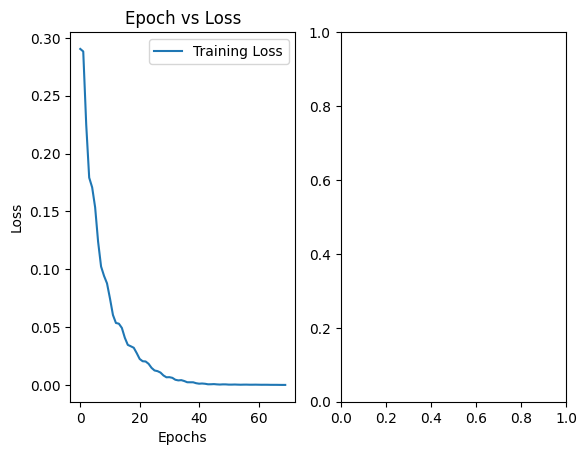

In [144]:
plot_loss_accuracy(torch.tensor(loss))

In [145]:
(y_train, predicted)

(tensor([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.]),
 tensor([0., 0., 0., -0., -0., -0., 1., 1., 1., 1., 1., 0., 0., 1.],
        grad_fn=<RoundBackward0>))

In [146]:
y_pred, predicted = handler.test(x_test)
handler.metricCalculator(y_test, predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6, 0.0, 0.0, 0.0)

In [147]:
y_test, y_pred, predicted

(tensor([0., 1., 0., 1., 0.]),
 tensor([0.4143, 0.4082, 0.4756, 0.2031, 0.2499]),
 tensor([0., 0., 0., 0., 0.]))

In [148]:
confusion_matrix(y_test, predicted) # (tn, fp, fn, tp)

array([[3, 0],
       [2, 0]])

In [149]:
samples_path = "/content/drive/MyDrive/Gav/Data/DRB3_Alleles2AminoAcids.xlsx"
df_test = pd.read_excel(samples_path)
df_test.iloc[:,0] = df_test.iloc[:,0].str[19:-6]
df_test.columns = list(df_test.columns[:2]) + ["Amino"+str(i) for i in range(len(df_test.columns[2:]))]
df1 = df_test.drop(df_test.columns[1], axis='columns')
df1 = df1.iloc[:,:1].join(pd.DataFrame(enc.fit_transform(df1[df1.columns[1:]]).toarray()))
df1.head()

,Allele,0,1,2,3,4,5,6,7,8,...,201,202,203,204,205,206,207,208,209,210
0,*152:01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,*067:01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,*035:01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,*100:05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,*034:02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [150]:
X = df1.iloc[:, 1:].values
X = torch.FloatTensor(X)
X = X.reshape(385, 1, 211)
_, predicted = handler.test(X)
predicted

tensor([0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 0., 1., 1., 1., 1., 1., 

In [151]:
df_test.iloc[:,1] = abs(predicted)
df_test.columns.values[1] = "S/R"
df_test.head()

<ipython-input-151-e692eb180d2f>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test.iloc[:,1] = abs(predicted)


,Allele,S/R,Amino0,Amino1,Amino2,Amino3,Amino4,Amino5,Amino6,Amino7,...,Amino68,Amino69,Amino70,Amino71,Amino72,Amino73,Amino74,Amino75,Amino76,Amino77
0,*152:01,0.0,Q,Y,H,K,G,E,C,H,...,R,E,C,R,H,N,Y,G,G,V
1,*067:01,1.0,E,Y,S,K,S,E,C,H,...,T,Y,C,R,H,N,Y,G,V,G
2,*035:01,1.0,E,Y,S,K,S,E,C,H,...,T,Y,C,R,H,N,Y,G,V,F
3,*100:05,1.0,E,Y,T,K,K,E,C,H,...,T,Y,C,R,H,N,Y,G,V,G
4,*034:02,1.0,E,Y,C,K,S,E,C,H,...,T,Y,C,R,H,N,Y,G,V,V


In [152]:
df_test.to_excel("/content/drive/MyDrive/Gav/Data/DRB3_AminoTest.xlsx", index=False)

In [ ]:
text = ['ABCDEFGHIJKLMNOPQRSTUVWXYZ-']

# Join all the sentences together and extract the unique characters from the combined sentences
chars = set(''.join(text))

# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))

# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}

In [ ]:
char2int

{'M': 0,
 'J': 1,
 'G': 2,
 'I': 3,
 'C': 4,
 'R': 5,
 '-': 6,
 'P': 7,
 'U': 8,
 'N': 9,
 'A': 10,
 'B': 11,
 'X': 12,
 'Y': 13,
 'D': 14,
 'Q': 15,
 'T': 16,
 'F': 17,
 'K': 18,
 'W': 19,
 'V': 20,
 'E': 21,
 'Z': 22,
 'L': 23,
 'H': 24,
 'O': 25,
 'S': 26}

In [ ]:
# Finding the length of the longest string in our data
maxlen = len(max(text, key=len))

# Padding

# A simple loop that loops through the list of sentences and adds a ' ' whitespace until the length of
# the sentence matches the length of the longest sentence
for i in range(len(text)):
  while len(text[i])<maxlen:
      text[i] += ' '

In [ ]:
inp = df.iloc[:,2:].apply(lambda x: ''.join(x.astype(str)), axis=1)
inp[0]

'EYSKSECHFFNGTERVRFLDRYYTNGEETVRFDSDWGEFRAVTELGRQDAEYWNSQKDFLEEKRAEVDRVCRHNYGGM'

In [ ]:
for i in range(len(inp)):
  inp[i] = [char2int[character] for character in inp[i]]
inp

0     [21, 13, 26, 18, 26, 21, 4, 24, 17, 17, 9, 2, ...
1     [21, 13, 26, 16, 26, 21, 4, 24, 17, 17, 9, 2, ...
2     [21, 13, 24, 18, 26, 21, 4, 24, 17, 17, 9, 2, ...
3     [21, 13, 26, 18, 26, 21, 4, 24, 17, 17, 9, 2, ...
4     [21, 13, 4, 18, 5, 21, 4, 24, 17, 17, 9, 2, 16...
5     [21, 13, 26, 18, 26, 21, 4, 24, 17, 17, 9, 2, ...
6     [21, 13, 26, 18, 26, 21, 4, 24, 17, 17, 9, 2, ...
7     [15, 13, 24, 18, 2, 21, 4, 24, 17, 17, 9, 2, 1...
8     [21, 13, 16, 18, 18, 21, 4, 24, 17, 17, 9, 2, ...
9     [15, 13, 24, 18, 2, 21, 4, 24, 17, 17, 9, 2, 1...
10    [21, 13, 26, 16, 26, 21, 4, 24, 17, 17, 9, 2, ...
11    [21, 13, 16, 18, 18, 21, 4, 24, 17, 17, 9, 2, ...
12    [21, 13, 13, 18, 5, 21, 4, 24, 17, 17, 9, 2, 1...
13    [21, 13, 10, 16, 26, 21, 4, 24, 17, 17, 9, 2, ...
14    [21, 13, 4, 18, 5, 21, 4, 24, 17, 17, 9, 2, 16...
15    [21, 13, 26, 18, 26, 21, 4, 24, 17, 17, 9, 2, ...
16    [21, 13, 5, 18, 26, 21, 4, 24, 17, 17, 9, 2, 1...
17    [21, 13, 26, 16, 26, 21, 4, 24, 17, 17, 9,

In [ ]:
dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)

    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

In [ ]:
inp = one_hot_encode(inp, dict_size, seq_len, batch_size)
inp

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
np.shape(inp)

(1, 25, 27)

In [ ]:
df.iloc[:,2:] = inp
df

ValueError: ignored

In [ ]:
# Creating lists that will hold our input and target sequences
input_seq = []
target_seq = []


for i in range(len(text)):
    # Remove last character for input sequence
  input_seq.append(text[i][:-1])

    # Remove first character for target sequence
  target_seq.append(text[i][1:])
  print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

Input Sequence: hey how are yo
Target Sequence: ey how are you
Input Sequence: good i am fine
Target Sequence: ood i am fine 
Input Sequence: have a nice da
Target Sequence: ave a nice day


In [ ]:
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]

In [ ]:
input_seq

[[7, 16, 10, 5, 7, 8, 2, 5, 1, 9, 16, 5, 10, 8],
 [14, 8, 8, 4, 5, 15, 5, 1, 12, 5, 6, 15, 11, 16],
 [7, 1, 0, 16, 5, 1, 5, 11, 15, 13, 16, 5, 4, 1]]

In [ ]:
# Input shape --> (Batch Size, Sequence Length, One-Hot Encoding Size)
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)
input_seq

array([[[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.

In [ ]:
pd.concat([df[col] for col in df.columns[2:]], axis=1)

,Amino0,Amino1,Amino2,Amino3,Amino4,Amino5,Amino6,Amino7,Amino8,Amino9,...,Amino68,Amino69,Amino70,Amino71,Amino72,Amino73,Amino74,Amino75,Amino76,Amino77
0,E,Y,S,K,S,E,C,H,F,F,...,R,V,C,R,H,N,Y,G,G,M
1,E,Y,S,T,S,E,C,H,F,F,...,T,Y,C,R,H,N,Y,G,G,V
2,E,Y,H,K,S,E,C,H,F,F,...,T,Y,C,R,H,N,Y,G,V,G
3,E,Y,S,K,S,E,C,H,F,F,...,T,Y,C,R,H,N,Y,G,V,F
4,E,Y,C,K,R,E,C,H,F,F,...,R,V,C,R,H,N,Y,G,V,V
5,E,Y,S,K,S,E,C,H,F,F,...,R,V,C,R,H,N,Y,G,V,G
6,E,Y,S,K,S,E,C,H,F,F,...,T,Y,C,R,H,N,Y,G,V,G
7,Q,Y,H,K,G,E,C,H,F,F,...,T,V,C,R,H,N,Y,G,V,V
8,E,Y,T,K,K,E,C,H,F,F,...,T,Y,C,R,H,N,Y,G,V,G
9,Q,Y,H,K,G,E,C,H,F,F,...,R,V,C,R,H,N,Y,G,G,V


0     EYSKSECHFFNGTERVRFLDRYYTNGEETVRFDSDWGEFRAVTELG...
1     EYSTSECHFFNGTERVRFLDRYFHNGEEFVRFDSDWGEYRAVTELG...
2     EYHKSECHFFNGTERLRYLDRYFYNGEEYVRFDSDWGEYRAVTELG...
3     EYSKSECHFFNGTERLRYLDRYFYNGEEYVRFDSDWGEYRAVTELG...
4     EYCKRECHFFNGTERVRFLDRCFHNGEEFVRFDSDWGEFRAVTELG...
5     EYSKSECHFFNGTERVRFLERSFYNGEENVRFDSDWGEYRAVTELG...
6     EYSKSECHFFNGTERVRFLDRYFHNGEEYVRFDSDWGEYRAVTELG...
7     QYHKGECHFFNGTERVRLLDRHFYNGEEYVRFDSDWDEFRAVTELG...
8     EYTKKECHFFNGTERVRFLNRYFHNGEEFVRFDSDWGEYRAVTELG...
9     QYHKGECHFFNGTERVRLLDRHFYNGEEFVRFDSDWDEFRAVTELG...
10    EYSTSECHFFNGTERVRYLDRYFHNGEEFVRFDSDWGEYRAVTELG...
11    EYTKKECHFFNGTERVRFLDRYFHNGEEFVRFDSDWGEYRAVTELG...
12    EYYKRECHFFNGTERVRFLDRCYTNGEETVRFDSDWGEFRAVTELG...
13    EYATSECHFFNGTERVRFLDRYFHNGEEFVRFDSDWGEFRAVTELG...
14    EYCKRECHFFNGTERVRFLDRYFYNGEEYVRFDSDWGEFRAVTELG...
15    EYSKSECHFFNGTERVRFLERSFYNGEENVRFDSDWGEYRAVTELG...
16    EYRKSECHFFNGTERVRFLDRYFYNGEEHVRFDSDWGEYRAVTELG...
17    EYSTSECHFFNGTERVRLLDRYFYNGEEFVRFDSDWGEYRAV